In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os, json

In [2]:
label_file_list = os.listdir('./Paper_Label/female') + os.listdir('./Paper_Label/male')
len(label_file_list)

12797

In [3]:
def convertSex(sex) :
    if (sex == 0) :
        return 'female'
    else :
        return 'male'

In [4]:
def convertPenType(penType) :
    if (penType == 0) :
        return 'ball'
    elif (penType == 1) :
        return 'marker'
    elif (penType == 2) :
        return 'stylus'
    else :
        return 'etc'

In [5]:
data_dict_list = []
file_location = ['./Paper_Label/female/', './Paper_Label/male/']

for location in file_location :
    for label_file in os.listdir(location):
        with open(location+label_file) as f:
            info_json = json.load(f)

            data_dict_list.append({
                'sex': convertSex(info_json['Images']['writer_sex']),
                'age': info_json['Images']['writer_age'],
                'pen_type': convertPenType(info_json['Images']['pen_type']),
                'pen_color': info_json['Images']['pen_color'],
                'image_file_name': label_file[:-4] + info_json['Images']['type'],
            })
        
df = pd.DataFrame(data_dict_list)

In [6]:
df

,sex,age,pen_type,pen_color,image_file_name
0,female,41,ball,black,IMG_OCR_53_4PR_09305.png
1,female,41,ball,black,IMG_OCR_53_4PR_09306.png
2,female,41,ball,black,IMG_OCR_53_4PR_09308.png
3,female,41,ball,black,IMG_OCR_53_4PR_09310.png
4,female,41,ball,black,IMG_OCR_53_4PR_09313.png
...,...,...,...,...,...
12792,male,24,ball,black,IMG_OCR_53_4PR_99763.png
12793,male,20,ball,black,IMG_OCR_53_4PR_99772.png
12794,male,20,ball,black,IMG_OCR_53_4PR_99910.png
12795,male,20,ball,black,IMG_OCR_53_4PR_99923.png


<Axes: xlabel='age', ylabel='Count'>

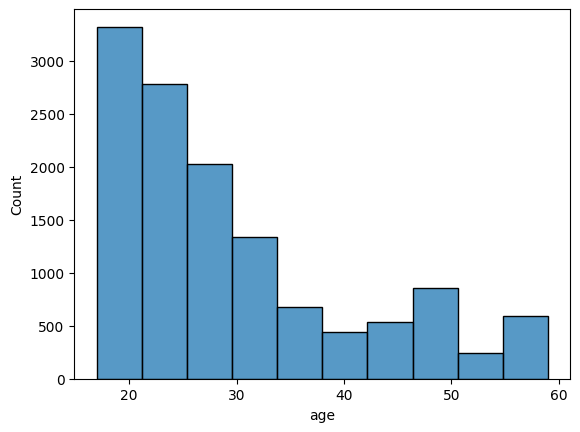

In [7]:
sns.histplot(df['age'], bins=10)

In [8]:
sorted_age = sorted(df['age'])

print('[10,20):', sorted_age.index(20))
print('[20,30):', sorted_age.index(30) - sorted_age.index(20))
print('[30,40):', sorted_age.index(40) - sorted_age.index(30))
print('[40,50):', sorted_age.index(52) - sorted_age.index(40))
print('[50,60):', len(sorted_age) - sorted_age.index(52))

[10,20): 2761
[20,30): 5364
[30,40): 2160
[40,50): 1681
[50,60): 831


In [9]:
def convertAgeRange(age) :
    if (10 <= age < 20) :
        return '10s'
    elif (20 <= age < 30) :
        return '20s'
    elif (30 <= age < 40) :
        return '30s'
    elif (40 <= age < 50) :
        return '40s'
    elif (50 <= age < 60) :
        return '50s'
    else :
        return '60s over'

In [10]:
df['age_range'] = df['age'].apply(convertAgeRange)

In [11]:
df

,sex,age,pen_type,pen_color,image_file_name,age_range
0,female,41,ball,black,IMG_OCR_53_4PR_09305.png,40s
1,female,41,ball,black,IMG_OCR_53_4PR_09306.png,40s
2,female,41,ball,black,IMG_OCR_53_4PR_09308.png,40s
3,female,41,ball,black,IMG_OCR_53_4PR_09310.png,40s
4,female,41,ball,black,IMG_OCR_53_4PR_09313.png,40s
...,...,...,...,...,...,...
12792,male,24,ball,black,IMG_OCR_53_4PR_99763.png,20s
12793,male,20,ball,black,IMG_OCR_53_4PR_99772.png,20s
12794,male,20,ball,black,IMG_OCR_53_4PR_99910.png,20s
12795,male,20,ball,black,IMG_OCR_53_4PR_99923.png,20s


# Visualization

## 나이대 확인

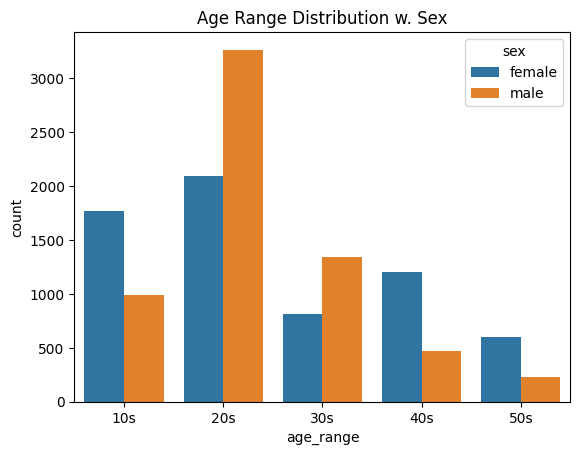

In [12]:
sns.countplot(data=df, x='age_range', hue='sex', order=['10s', '20s', '30s', '40s', '50s'])
plt.title('Age Range Distribution w. Sex')
plt.show()

In [13]:
df['age_range'].value_counts().sort_index(ascending=True)

10s    2761
20s    5364
30s    2160
40s    1681
50s     831
Name: age_range, dtype: int64

`10s`(2761개) / `20s`(5364개) / `30s`(2160개) / `40s + 50s`(2512개)로 집단을 나눌 수 있음

## 펜 색깔 & 종류 확인

In [14]:
df['pen_color'].value_counts()

black    12797
Name: pen_color, dtype: int64

펜의 색상이 `black`밖에 존재하지 않으므로, 해당 column은 삭제하여도 된다.

In [15]:
df['pen_type'].value_counts()

ball    12797
Name: pen_type, dtype: int64

펜의 종류 또한 `ball`밖에 존재하지 않으므로, 해당 column은 삭제한다.

In [16]:
df.drop(['pen_color', 'pen_type'], axis=1, inplace=True)
df

,sex,age,image_file_name,age_range
0,female,41,IMG_OCR_53_4PR_09305.png,40s
1,female,41,IMG_OCR_53_4PR_09306.png,40s
2,female,41,IMG_OCR_53_4PR_09308.png,40s
3,female,41,IMG_OCR_53_4PR_09310.png,40s
4,female,41,IMG_OCR_53_4PR_09313.png,40s
...,...,...,...,...
12792,male,24,IMG_OCR_53_4PR_99763.png,20s
12793,male,20,IMG_OCR_53_4PR_99772.png,20s
12794,male,20,IMG_OCR_53_4PR_99910.png,20s
12795,male,20,IMG_OCR_53_4PR_99923.png,20s
